# Gerar a Camada Gold

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from load_lakehouse import *

In [2]:
df = %sql select \
        country, \
        date_format(InvoiceDate, 'yyyy-MM-dd') as InvoiceDate, \
        type, \
        sum(quantity) as qty \
    from silver_vendas \
    group by all \
    order by country, InvoiceDate, type


In [3]:
%%bash
if [ -d lakehouse/gold ]; then
    rm -Rf lakehouse/gold
fi

In [4]:
%%time

df.write.format("delta").mode("overwrite").save("lakehouse/gold/invoicesbycountry")

CPU times: user 1.69 ms, sys: 1.49 ms, total: 3.18 ms
Wall time: 6.54 s


In [5]:
%%time

(df
  .write
  .format("jdbc")
  .option("url", postgresUrl)
  .option("driver", "org.postgresql.Driver")
  .option("dbtable", "invoicesbycountry")
  .option("user", postgresUsername)
  .option("password", postgresPassword)
  .mode("overwrite")
  .save()
)

Py4JJavaError: An error occurred while calling o53.save.
: org.postgresql.util.PSQLException: The connection attempt failed.
	at org.postgresql.core.v3.ConnectionFactoryImpl.openConnectionImpl(ConnectionFactoryImpl.java:354)
	at org.postgresql.core.ConnectionFactory.openConnection(ConnectionFactory.java:54)
	at org.postgresql.jdbc.PgConnection.<init>(PgConnection.java:263)
	at org.postgresql.Driver.makeConnection(Driver.java:443)
	at org.postgresql.Driver.connect(Driver.java:297)
	at org.apache.spark.sql.execution.datasources.jdbc.connection.BasicConnectionProvider.getConnection(BasicConnectionProvider.scala:49)
	at org.apache.spark.sql.execution.datasources.jdbc.connection.ConnectionProviderBase.create(ConnectionProvider.scala:102)
	at org.apache.spark.sql.jdbc.JdbcDialect.$anonfun$createConnectionFactory$1(JdbcDialects.scala:123)
	at org.apache.spark.sql.jdbc.JdbcDialect.$anonfun$createConnectionFactory$1$adapted(JdbcDialects.scala:119)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcRelationProvider.createRelation(JdbcRelationProvider.scala:50)
	at org.apache.spark.sql.execution.datasources.SaveIntoDataSourceCommand.run(SaveIntoDataSourceCommand.scala:47)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult$lzycompute(commands.scala:75)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult(commands.scala:73)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.executeCollect(commands.scala:84)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:118)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:195)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:94)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:104)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:488)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:81)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:79)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:133)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:856)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:387)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:360)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:247)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: java.net.UnknownHostException: <your service name>.nemesys-101.svc
	at java.base/sun.nio.ch.NioSocketImpl.connect(NioSocketImpl.java:572)
	at java.base/java.net.SocksSocketImpl.connect(SocksSocketImpl.java:327)
	at java.base/java.net.Socket.connect(Socket.java:633)
	at org.postgresql.core.PGStream.createSocket(PGStream.java:243)
	at org.postgresql.core.PGStream.<init>(PGStream.java:98)
	at org.postgresql.core.v3.ConnectionFactoryImpl.tryConnect(ConnectionFactoryImpl.java:132)
	at org.postgresql.core.v3.ConnectionFactoryImpl.openConnectionImpl(ConnectionFactoryImpl.java:258)
	... 50 more


In [6]:
df = df.toPandas()

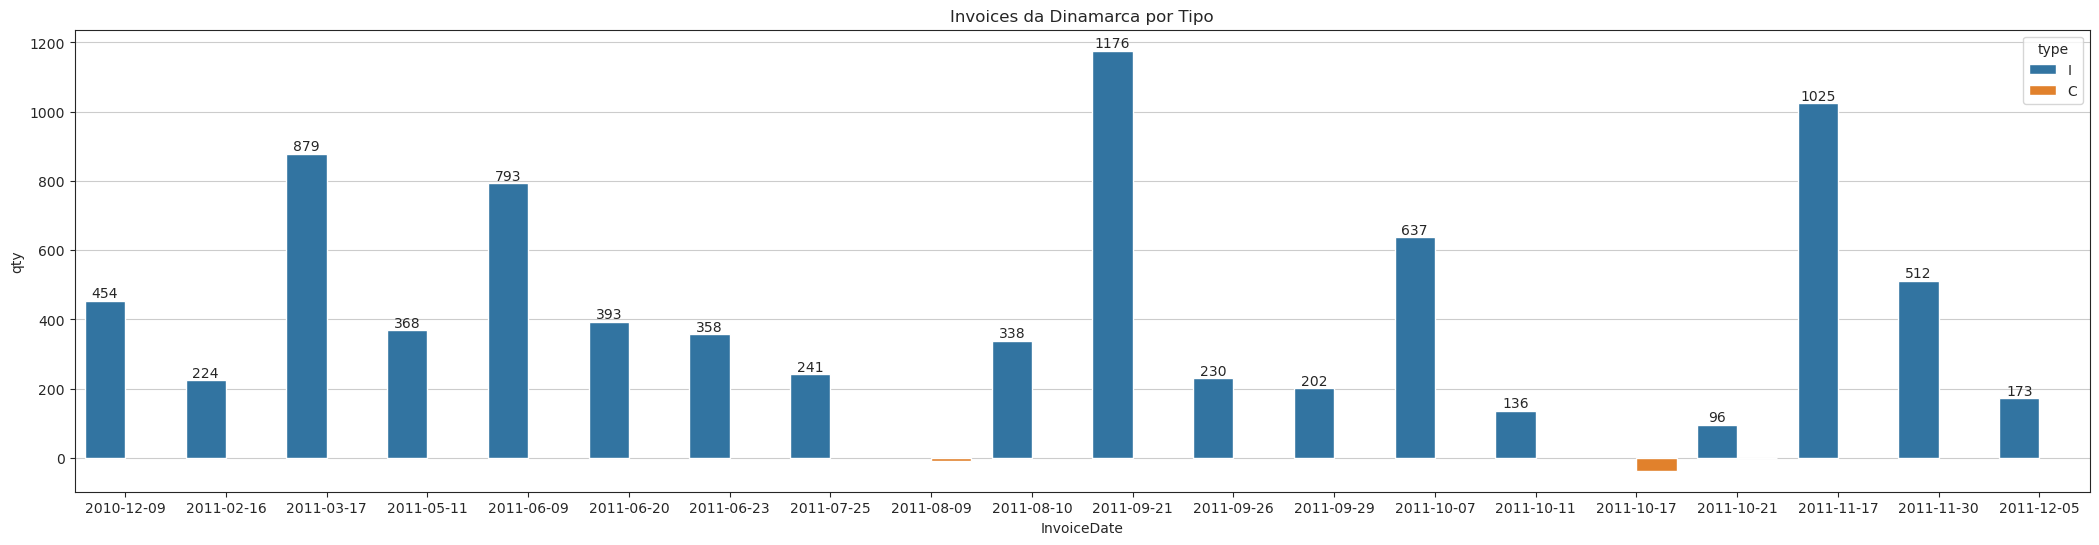

In [7]:
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(26,6))
# sns.set_style("darkgrid")
sns.set_style("ticks",{'axes.grid' : True})

ax = sns.barplot(df[df["country"] == "Denmark"], x="InvoiceDate", y="qty", hue="type")
ax.bar_label(ax.containers[0], fontsize=10);
t = plt.title('Invoices da Dinamarca por Tipo')